In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import tensorflow as tf


iteration no: 0, loss: 29838926.444667853
iteration no: 1, loss: 25949868.98528431
iteration no: 2, loss: 26220269.06554956
iteration no: 3, loss: 26517632.130325228
iteration no: 4, loss: 24490641.516573627
iteration no: 5, loss: 19365951.723266084
iteration no: 6, loss: 13177617.740311315
iteration no: 7, loss: 7924915.577720184
iteration no: 8, loss: 4542644.2354776785
iteration no: 9, loss: 2642597.328520773
iteration no: 10, loss: 1648200.8976480241
iteration no: 11, loss: 1122292.1819825342
iteration no: 12, loss: 829470.6984083661
iteration no: 13, loss: 651911.9001532556
iteration no: 14, loss: 533881.3821030419
iteration no: 15, loss: 448671.31101604004
iteration no: 16, loss: 383204.0429058899
iteration no: 17, loss: 330685.69458516885
iteration no: 18, loss: 287368.2028390303
iteration no: 19, loss: 251086.6441492751
iteration no: 20, loss: 220336.98040523886
iteration no: 21, loss: 194044.7633997909
iteration no: 22, loss: 171461.45428411986
iteration no: 23, loss: 151940.3

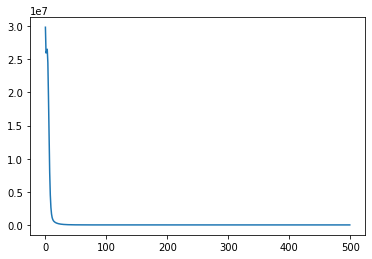

In [0]:
#implementing 2 layer network using numpy only

N, D_in, H, D_out = 64, 1000, 100, 10

x=np.random.randn(N, D_in)
y=np.random.randn(N, D_out)
w1=np.random.randn(D_in, H)
w2=np.random.randn(H, D_out)
lr=1e-6

iter_no=list()
cost_for_iter=list()
for iteration in range(500):

    h=x.dot(w1)
    h_relu=np.maximum(h, 0)
    y_pred=h_relu.dot(w2)

    cost=np.square(y_pred-y).sum()
    print('iteration no: {0}, loss: {1}'.format(iteration, cost))

    iter_no.append(iteration)
    cost_for_iter.append(cost)
    #gradient calculation

    grad_y_pred=2*(y_pred-y)            #shape is N, D_out
    grad_w2=h_relu.T.dot(grad_y_pred)    #shape is 100, 10
    grad_h_relu=grad_y_pred.dot(w2.T)   #shape is N, 100
    grad_h=grad_h_relu.copy()    #shape is N, 100
    grad_h[h<0]=0       #shape is N, 100
    grad_w1=x.T.dot(grad_h)         #shape is 1000, 100

    #updating the parameters

    w1-=lr*grad_w1
    w2-=lr*grad_w2


plt.plot(iter_no, cost_for_iter)



iteration no: 0, loss: 31382720.0
iteration no: 1, loss: 26206608.0
iteration no: 2, loss: 25460836.0
iteration no: 3, loss: 24978668.0
iteration no: 4, loss: 22539578.0
iteration no: 5, loss: 17689156.0
iteration no: 6, loss: 12113306.0
iteration no: 7, loss: 7474441.0
iteration no: 8, loss: 4442882.0
iteration no: 9, loss: 2691386.5
iteration no: 10, loss: 1740192.875
iteration no: 11, loss: 1216705.25
iteration no: 12, loss: 914314.5
iteration no: 13, loss: 725178.4375
iteration no: 14, loss: 596729.4375
iteration no: 15, loss: 502895.25
iteration no: 16, loss: 430327.65625
iteration no: 17, loss: 371926.0
iteration no: 18, loss: 323708.4375
iteration no: 19, loss: 283272.4375
iteration no: 20, loss: 248915.734375
iteration no: 21, loss: 219518.15625
iteration no: 22, loss: 194196.671875
iteration no: 23, loss: 172293.984375
iteration no: 24, loss: 153243.859375
iteration no: 25, loss: 136627.34375
iteration no: 26, loss: 122092.84375
iteration no: 27, loss: 109336.625
iteration no:

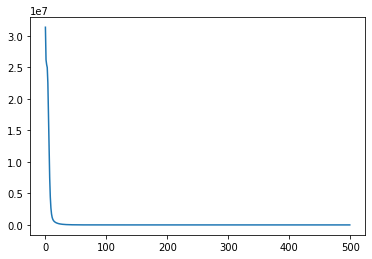

In [0]:
#implementing above neural network using PyTorch

dtype=torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

N, D_in, H, D_out = 64, 1000, 100, 10

#creating random tensors

x=torch.randn(N, D_in, dtype=dtype, device=device)
y=torch.randn(N, D_out, dtype=dtype, device=device)
w1=torch.randn(D_in, H, dtype=dtype, device=device)
w2=torch.randn(H, D_out, dtype=dtype, device=device)

iterations=list()
costs=list()

lr=1e-6

for i in range(500):

    #forward_prop

    h=x.mm(w1)
    h_relu=h.clamp(min=0)
    y_pred=h_relu.mm(w2)

    cost=(y_pred-y).pow(2).sum().item()

    iterations.append(i)
    costs.append(cost)

    print('iteration no: {0}, loss: {1}'.format(i, cost))

    #back prop

    grad_y_pred = 2*(y_pred-y)
    grad_w2=h_relu.t().mm(grad_y_pred)
    grad_h_relu=grad_y_pred.mm(w2.t())
    grad_h=grad_h_relu.clone()
    grad_h[h<0]=0
    grad_w1=x.t().mm(grad_h)

    #parameter update

    w1-=lr*grad_w1
    w2-=lr*grad_w2

plt.plot(iterations, costs)



iteration no: 0, loss: 37649384.0
iteration no: 1, loss: 37519260.0
iteration no: 2, loss: 39444132.0
iteration no: 3, loss: 35762232.0
iteration no: 4, loss: 25252920.0
iteration no: 5, loss: 13778731.0
iteration no: 6, loss: 6603060.0
iteration no: 7, loss: 3321234.25
iteration no: 8, loss: 1969950.125
iteration no: 9, loss: 1371814.75
iteration no: 10, loss: 1057304.375
iteration no: 11, loss: 858754.5
iteration no: 12, loss: 716233.125
iteration no: 13, loss: 606338.375
iteration no: 14, loss: 518341.78125
iteration no: 15, loss: 446401.0625
iteration no: 16, loss: 386825.34375
iteration no: 17, loss: 336991.5625
iteration no: 18, loss: 295009.34375
iteration no: 19, loss: 259448.078125
iteration no: 20, loss: 229138.5625
iteration no: 21, loss: 203156.875
iteration no: 22, loss: 180775.09375
iteration no: 23, loss: 161434.640625
iteration no: 24, loss: 144633.9375
iteration no: 25, loss: 130004.359375
iteration no: 26, loss: 117190.3125
iteration no: 27, loss: 105920.5390625
itera

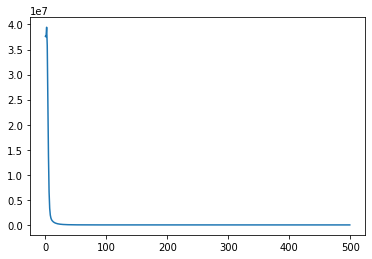

In [0]:
#same network using auto grad

dtype=torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

N, D_in, H, D_out = 64, 1000, 100, 10

#creating random tensors

x=torch.randn(N, D_in, dtype=dtype, device=device)
y=torch.randn(N, D_out, dtype=dtype, device=device)
w1=torch.randn(D_in, H, dtype=dtype, device=device, requires_grad=True)
w2=torch.randn(H, D_out, dtype=dtype, device=device, requires_grad=True)

iterations=list()
costs=list()

lr=1e-6

for i in range(500):
    y_pred=(x.mm(w1).clamp(min=0)).mm(w2)

    cost=(y_pred-y).pow(2).sum()

    iterations.append(i)
    costs.append(cost.item())

    print('iteration no: {0}, loss: {1}'.format(i, cost.item()))

    cost.backward()

    #update params
    with torch.no_grad():
        w1-=lr*(w1.grad)
        w2-=lr*(w2.grad)

    w1.grad.zero_()
    w2.grad.zero_()

plt.plot(iterations, costs)

In [0]:
#making self autograd fxns.

class MyRelu(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input):

        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        input, =ctx.saved_tensors
        grad_input=grad_output.clone()
        grad_input[input<0]=0
        return grad_input

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # To apply our Function, we use Function.apply method. We alias this as 'relu'.
    relu = MyRelu.apply

    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()





99 874.4266357421875
199 5.93480920791626
299 0.06529156863689423
399 0.0011585685424506664
499 0.00011111088679172099


In [0]:
#Using nn module

N, D_in, H, D_out = 64, 1000, 100, 10

x=torch.randn(N, D_in)
y=torch.randn(N, D_out)

model=torch.nn.Sequential(torch.nn.Linear(D_in, H), torch.nn.ReLU(), torch.nn.Linear(H, D_out))
                                            

loss_fn = torch.nn.MSELoss(reduce='sum')

lr=1e-6

for t in range(500):
    y_pred=model(x)
    
    cost=loss_fn(y_pred, y)

    if t % 100 == 99:
        print(t, loss.item())

    model.zero_grad()

    cost.backward()

    with torch.no_grad():
        
        for para in model.parameters():
            para-=lr*para.grad

99 0.00011111088679172099


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


199 0.00011111088679172099
299 0.00011111088679172099
399 0.00011111088679172099
499 0.00011111088679172099


In [0]:
#using optimiser

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

#defining optimiser

lr=1e-6

optimiser=optim.Adam(model.parameters(), lr=lr)

for t in range(500):
    y_pred=model(x)

    cost=loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, cost.item())

    optimiser.zero_grad()
    cost.backward()

    optimiser.step()


99 602.9542236328125
199 587.3330688476562
299 572.191650390625
399 557.6245727539062
499 543.5125732421875


In [0]:
#defining our own model

class self_net(torch.nn.Module):
    def __init__(self, D_in, H, D_out):

        super(self_net, self).__init__()

        self.linear1=torch.nn.Linear(D_in, H)
        self.linear2=torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu=self.linear1(x).clamp(min=0)
        y_pred=self.linear2(h_relu)

        return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
model=self_net(D_in, H, D_out)
loss=torch.nn.MSELoss(reduction='sum')
optimiser=optim.Adam(model.parameters(), lr=1e-4)

for i in range(500):

    y_pred=model(x)
    cost=loss(y_pred, y)
    if i%100 == 99 :
        print(i, cost.item())
    optimiser.zero_grad()
    cost.backward()
    optimiser.step()


99 56.59048080444336
199 0.858749270439148
299 0.0076751708984375
399 4.652299321605824e-05
499 9.377489362805136e-08


In [0]:
#control flow + weight sharing 

class DynamicNet(torch.nn.Module):

    def __init__(self, D_in, H, D_out):

        super(DynamicNet, self).__init__()

        self.input_linear=torch.nn.Linear(D_in, H)
        self.middle_linear=torch.nn.Linear(H, H)
        self.output_linear=torch.nn.Linear(H, D_out)

    def forward(self, x):

        h_relu=self.input_linear(x).clamp(min=0)
        
        for i in range(random.randint(0, 3)):
            h_relu=self.middle_linear(h_relu).clamp(min=0)

        y_pred=self.output_linear(h_relu)

        return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10

x=torch.randn(N, D_in)
y=torch.randn(N, D_out)

model=DynamicNet(D_in, H, D_out)

loss=torch.nn.MSELoss(reduction='sum')
optimiser=optim.SGD(model.parameters(), lr=1e-4, momentum=0.8)

for t  in range(500):

    y_pred=model(x)

    cost=loss(y_pred, y)

    if t%100 == 99:
        print(t, cost)

    optimiser.zero_grad()
    cost.backward()
    optimiser.step()

99 tensor(24.3545, grad_fn=<MseLossBackward>)
199 tensor(19.3616, grad_fn=<MseLossBackward>)
299 tensor(3.3757, grad_fn=<MseLossBackward>)
399 tensor(0.3158, grad_fn=<MseLossBackward>)
499 tensor(5.1351, grad_fn=<MseLossBackward>)


In [0]:
import tensorflow as tf
import numpy as np

# First we set up the computational graph:

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create placeholders for the input and target data; these will be filled
# with real data when we execute the graph.
x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

# Create Variables for the weights and initialize them with random data.
# A TensorFlow Variable persists its value across executions of the graph.
w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))

# Forward pass: Compute the predicted y using operations on TensorFlow Tensors.
# Note that this code does not actually perform any numeric operations; it
# merely sets up the computational graph that we will later execute.
h = tf.matmul(x, w1)
h_relu = tf.maximum(h, tf.zeros(1))
y_pred = tf.matmul(h_relu, w2)

# Compute loss using operations on TensorFlow Tensors
loss = tf.reduce_sum((y - y_pred) ** 2.0)

# Compute gradient of the loss with respect to w1 and w2.
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Update the weights using gradient descent. To actually update the weights
# we need to evaluate new_w1 and new_w2 when executing the graph. Note that
# in TensorFlow the the act of updating the value of the weights is part of
# the computational graph; in PyTorch this happens outside the computational
# graph.
learning_rate = 1e-6
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)

# Now we have built our computational graph, so we enter a TensorFlow session to
# actually execute the graph.
with tf.Session() as sess:
    # Run the graph once to initialize the Variables w1 and w2.
    sess.run(tf.global_variables_initializer())

    # Create numpy arrays holding the actual data for the inputs x and targets
    # y
    x_value = np.random.randn(N, D_in)
    y_value = np.random.randn(N, D_out)
    for t in range(500):
        # Execute the graph many times. Each time it executes we want to bind
        # x_value to x and y_value to y, specified with the feed_dict argument.
        # Each time we execute the graph we want to compute the values for loss,
        # new_w1, and new_w2; the values of these Tensors are returned as numpy
        # arrays.
        loss_value, _, _ = sess.run([loss, new_w1, new_w2],
                                    feed_dict={x: x_value, y: y_value})
        if t % 100 == 99:
            print(t, loss_value)

AttributeError: ignored